# Desafio Python

In [1]:
#Importa a biblioteca e renomeia
import matplotlib.pyplot as plt
import pandas as pd

#salva o caminho do arquivo
arquivo = "googleplaystore.csv"

#lê o arquivo
data = pd.read_csv(arquivo)

# Etapa 1

In [2]:
#Remove linhas duplicadas
def limparDuplicados(data):
    data_limpo = data.drop_duplicates(subset='App') #Seleciona e filtra os apps pelo nome dele
    return data_limpo #retorna sem as duplicatas

data = limparDuplicados(data) #chama a função e salva na variavel data

# Etapa 2

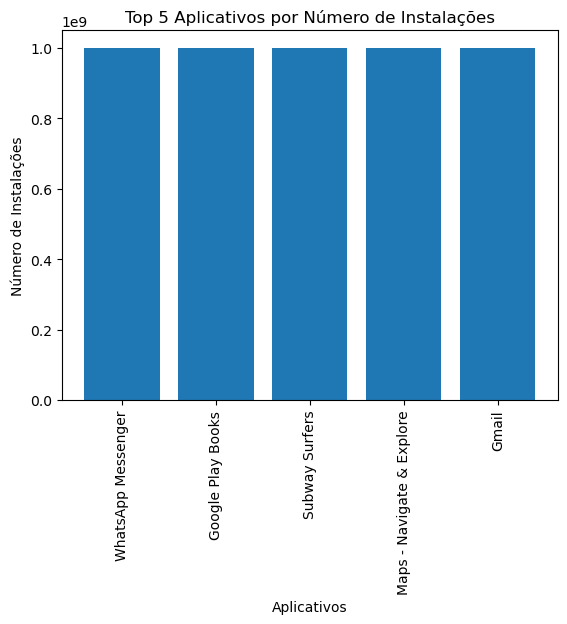

In [3]:
# função def  - declara a função para ser usada no codigo, para não precisar repetir o mesmo codigo varias vezes
# coluna tinha caracter nao numericos
# função substitui tudo que não for numerico
def converter_installs(installs):
    installs_sem_caracteres = installs.str.replace('[^\d]', '', regex=True)
    return pd.to_numeric(installs_sem_caracteres)

data['Installs'] = converter_installs(data['Installs'])

#grafico de barras
def graficoBarras(data):
    dados_ordenados = data.sort_values(by='Installs', ascending=False) #ordena os dados pela coluna installs em ordem desc
    cinco_primeiros = dados_ordenados.head(5) #5 primeiros
    plt.bar(cinco_primeiros['App'], cinco_primeiros['Installs']) #cria o grafico
    plt.xlabel('Aplicativos') #nome eixo x
    plt.ylabel('Número de Instalações') #nome eixo y
    plt.title('Top 5 Aplicativos por Número de Instalações') #titulo do grafico
    plt.xticks(rotation=90) # rotação do eixo x
    plt.show() #exibe o gráfico

graficoBarras(data) #DataFrame - dado do arquivo

# Etapa 3

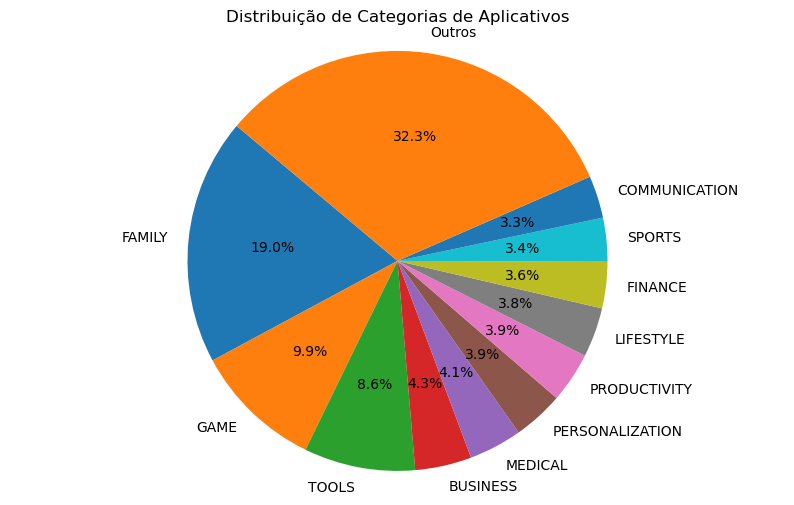

In [4]:
#Gráfico de Pizza
def graficoPizza(data):
    categorias_contagem = data['Category'].value_counts() #contagem categorias

    # Calculando a porcentagem de cada categoria em relação ao total
    total = categorias_contagem.sum() #soma
    categorias_porcentagem = categorias_contagem / total * 100 #calcula porcentagem

    # Agrupa categorias com menos de 3% em "Outros"
    categorias_porcentagem['Outros'] = categorias_porcentagem[categorias_porcentagem < 3].sum()
    categorias_porcentagem = categorias_porcentagem[categorias_porcentagem >= 3]

    # Exibindo o gráfico de pizza
    plt.figure(figsize=(10, 6))  # Definindo o tamanho do gráfico
    plt.pie(categorias_porcentagem, labels=categorias_porcentagem.index, autopct='%1.1f%%', startangle=140) #cria o grafico
    plt.title('Distribuição de Categorias de Aplicativos') #titulo
    plt.axis('equal')  # Assegura que o gráfico de pizza seja desenhado como um círculo
    plt.show() #exibe o grafico

graficoPizza(data) #dados do arquivo

# Etapa 4

In [5]:
#Aplicativo mais caro

#função remove string $ do preço
def removeCifrao(price):
    price_sem_caracteres = price.str.replace('$', '')
    return  price_sem_caracteres.astype(float) #converte para float

#função para achar app 
def appMaisCaro(data):
    data_filtered = data[data["Type"] == "Paid"].copy()  # filtra app pagos
    data_filtered.loc[:, 'Price'] = removeCifrao(data_filtered['Price']) #remove cifrão
    dados_ordenados = data_filtered.sort_values(by='Price', ascending=False) #ordena em ordem desc
    mais_caro = dados_ordenados.head(1) #lê o primeiro da lista
    nome_do_app = mais_caro['App'].values[0] #extrai o nome
    preco = mais_caro['Price'].values[0] #extrai o preço
    print(f'O aplicativo mais caro é {nome_do_app} custando {preco}') #exibe o resultado

appMaisCaro(data) #executa a função

O aplicativo mais caro é I'm Rich - Trump Edition custando 400.0


# Etapa 5

In [6]:
#Mature 17+

def contaQtnRegistros(data, colum, value): #conta os registros
    data_filtered = data[data[colum] == value] #filtra pelo value "mature 17+"
    qtn_values = data_filtered.groupby(colum).size().values[0] #agrupa pela coluna content rating
    print(f"Na coluna {colum} exitem {qtn_values} registros com o nome {value}")
# função conta quantos registros têm a classificação "Mature 17+" na coluna "Content Rating" e imprimir essa informação.
contaQtnRegistros(data, "Content Rating", "Mature 17+")

Na coluna Content Rating exitem 393 registros com o nome Mature 17+


# Etapa 6

In [7]:
# Top 10 Apps por número de reviews

def rankTop10Reviews(data):
    dados_ordenados = data.sort_values(by='Reviews', ascending=False)#sort - ordena os valores igual ao ORDER BY
    ten_most = dados_ordenados.head(10)#lê as 10 primeiras linhas
    print(ten_most[['App', 'Reviews']]) #exibe

rankTop10Reviews(data) #executa função

                                                    App   Reviews
2544                                           Facebook  78158306
336                                  WhatsApp Messenger  69119316
2545                                          Instagram  66577313
335            Messenger – Text and Video Chat for Free  56642847
1670                                     Clash of Clans  44891723
4005            Clean Master- Space Cleaner & Antivirus  42916526
1654                                     Subway Surfers  27722264
3665                                            YouTube  25655305
7536  Security Master - Antivirus, VPN, AppLock, Boo...  24900999
1660                                       Clash Royale  23133508


# Etapa 7 - Parte I

In [8]:
# 10 apps mais lucrativos

def valorGanhoApp(data):
    data_filtered = data[data["Type"] == "Paid"].copy() # Filtrar apenas aplicativos pagos e fazer uma cópia do DataFrame original
    data_filtered.loc[:, 'Price'] = removeCifrao(data_filtered['Price']) # Atribuir valores usando .loc
    data_filtered.loc[:, 'valorGanho'] = data_filtered['Installs'] * data_filtered['Price'] # Cálculo do lucro e atribuição usando .loc
    dados_ordenados = data_filtered.sort_values(by='valorGanho', ascending=False) #ordena desc
    topDezOrdenados = dados_ordenados.head(10) #lista s 10 primeiros
    print(f"Os 10 Apps mais lucrativos: \n {topDezOrdenados[['App', 'valorGanho']]}") #exibe

valorGanhoApp(data) #executa a função



Os 10 Apps mais lucrativos: 
                                 App  valorGanho
2241                      Minecraft  69900000.0
5351                      I am rich  39999000.0
5356              I Am Rich Premium  19999500.0
4034                  Hitman Sniper   9900000.0
7417  Grand Theft Auto: San Andreas   6990000.0
2883            Facetune - For Free   5990000.0
5578        Sleep as Android Unlock   5990000.0
8804            DraStic DS Emulator   4990000.0
4367       I'm Rich - Trump Edition   4000000.0
5354                 I am Rich Plus   3999900.0


# Etapa 7 - Parte II

In [9]:
#App gratuito mais baixado na categoria social

def appGratuitoMaisBaixado(data):
    filtro = (data['Type'] == 'Free') & (data['Category'] == 'SOCIAL') # filtra categotia free + social
    data_filtered = data[filtro] #seleciona o filtro acima
    dados_ordenados = data_filtered.sort_values(by=['Installs', 'Rating' ], ascending=False) #ordena os app pelo numero de instalação em ordem desc
    appMaisBaixado = dados_ordenados.head(1) #seleciona o primeiro da lista

    nome_do_app = appMaisBaixado['App'].values[0] #extrai o nome do app
    installs = appMaisBaixado['Installs'].values[0] #extrai o numero de instalações
    rating = appMaisBaixado['Rating'].values[0] #extrai a avaliação
    print(f"O app gratuito mais baixado da categoria SOCIAL e com maior nota é o \n {nome_do_app} com {installs} donwloads e com nota {rating}") #exibe

appGratuitoMaisBaixado(data) #executa

O app gratuito mais baixado da categoria SOCIAL e com maior nota é o 
 Instagram com 1000000000 donwloads e com nota 4.5


# Etapa 8 - Parte I

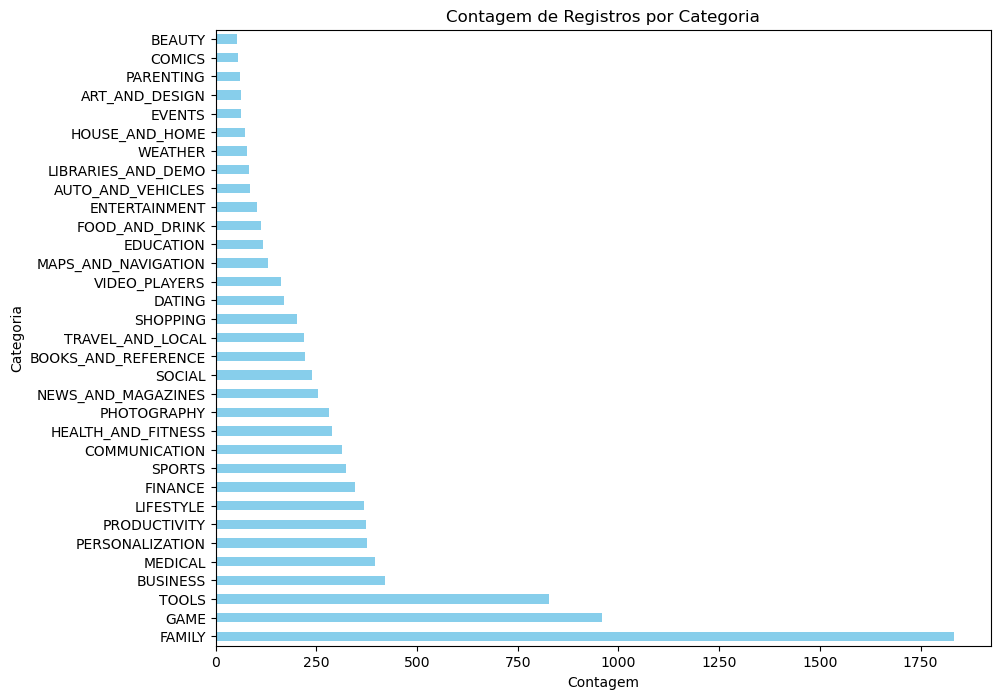

In [10]:
# Contagem de Registros por Categoria - Barra horizontal

def geraGraficoUm(data):
    dados = data['Category'].value_counts() #contagem de registro da coluna category
    plt.figure(figsize=(10, 8)) #tamanho largura X altura
    dados.plot(kind='barh', color='skyblue') #gera o grafico
    plt.title('Contagem de Registros por Categoria') # titulo
    plt.xlabel('Contagem') #nome eixo x
    plt.ylabel('Categoria') #nome eixo y
    plt.show() #exibe o grafico

geraGraficoUm(data) #executa



# Etapa 8 - Parte II

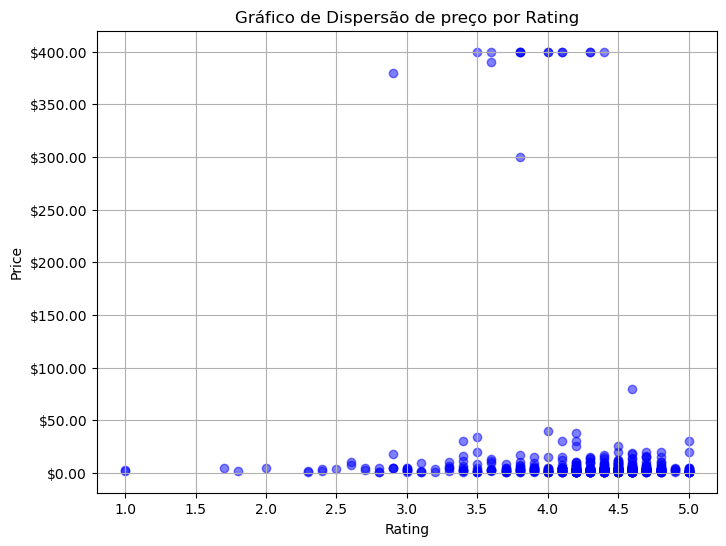

In [11]:
#Gráfico de dispersão de preço por Rating 
# visualizar a relação entre o preço e a classificação de avaliação ("Rating") dos aplicativos pagos 

def geraGraficoDois(data):
    data_filtered = data[data["Type"] == "Paid"].copy()  # filtra apenas apps pagos
    data_filtered.loc[:, 'Price'] = removeCifrao(data_filtered['Price']) #remove cifrão
    plt.figure(figsize=(8, 6)) #tamanho largura x altura
    plt.scatter(data_filtered['Rating'], data_filtered['Price'], alpha=0.5, color='blue') #gera o gráfico
    plt.title('Gráfico de Dispersão de preço por Rating') #titulo do grafico
    plt.gca().yaxis.set_major_formatter('${:.2f}'.format)  # exibe valores com duas casas decimais. 
    plt.xlabel('Rating') #nome eixo x
    plt.ylabel('Price') #nome eixo y
    plt.grid(True) #adiciona grades ao gráfico
    plt.show() #exibe o gráfico

geraGraficoDois(data) #executa